## Explorando as variáveis do dataset
* Verificando medidas de centralidade e dispersão das variáveis
disponíveis

In [2]:
import pandas as pd

O dataset que usaremos tem informações sobre doses individuais da vacina contra covid-19 aplicada pelo SUS no estado da Paraíba. Cada entrada tem informações sobre o paciente que a recebe, como idade, sexo, etnia, município de aplicação da dose, entre outros.

In [12]:
vax_df = pd.read_csv("datasets/dados_vacinacao.csv")
vax_df.head(3)

,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_nmMunicipio,paciente_endereco_cep,estabelecimento_municipio_nome,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,paciente_id
0,44,1977-04-18,M,1,BRANCA,ARAPIRACA,57510,PATOS,912,Médico,9,Trabalhadores de Saúde,2021-11-11,Reforço,87,COVID-19 PFIZER - COMIRNATY,f9495cb04daf5adb495d22c9c88b31883f191fb762ab27...
1,5,2016-11-18,M,1,BRANCA,PARELHAS,None,CAMPINA GRANDE,207,Pessoas de 5 a 11 anos,0,NaN,2022-02-07,1ª Dose,99,COVID-19 PEDIÁTRICA - PFIZER COMIRNATY,52288faace8c986872faca7101868ae8a23fefd435cd51...
2,39,1982-01-23,F,99,SEM INFORMACAO,CAMPINA GRANDE,58410,CAMPINA GRANDE,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-07-16,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,0ffaed327aac7fe8abf0b35471b0b1fa60f9fc48ff7d9c...


In [4]:
vax_df.shape

(2806792, 17)

## Limpeza dos dados

Verificamos, ao fazer análises exploratórias iniciais, que temos valores negativos e valores acima de 115 anos na coluna que armazena a idade dos pacientes. Como a quantidade desses valores anômalos é baixa (37 casos), convém deletá-los. A remoção desses dados não afetará relevantemente nossos estudos, pois esse número é insignificante comparado a quase 3 milhões de entradas totais do dataset.

In [14]:
idades_negativas = pd.DataFrame(vax_df.paciente_idade [vax_df.paciente_idade < 0])
idades_negativas.count()

paciente_idade    10
dtype: int64

In [15]:
idades_acima115 = pd.DataFrame(vax_df.paciente_idade [vax_df.paciente_idade > 115])
idades_acima115.count()

paciente_idade    27
dtype: int64

## Deletando as linhas incoerentes


In [28]:
vax_df = vax_df[vax_df.paciente_idade >= 0]
vax_df = vax_df[vax_df.paciente_idade <= 115]

In [29]:
vax_df["paciente_idade"].describe()

count    2.806755e+06
mean     4.116467e+01
std      2.021718e+01
min      0.000000e+00
25%      2.500000e+01
50%      3.900000e+01
75%      5.600000e+01
max      1.150000e+02
Name: paciente_idade, dtype: float64

Usando a função describe, calculamos rapidamente algumas medidas de centralidade e dispersão para a variável idade.

* Temos 2.806.755 entradas.
* A média de idades é 41,16 anos, com desvio padrão de 20,21 anos.
* O valor mínimo entre as idades é 0 anos.
* O primeiro quartil é 25 anos, a mediana é 39, o terceiro quartil é 56 anos.
* O valor máximo entre as idades é 115 anos.

In [10]:
vax_df["paciente_idade"].mode()

0    39
Name: paciente_idade, dtype: int64

A moda das idades é 39 anos.

Observamos que temos valores bem próximos de média, mediana e moda para essa variável (41.16, 39 e 39, respectivamente).

Por fim, o gráfico abaixo representa o boxplot para a variável idade:

<AxesSubplot:>

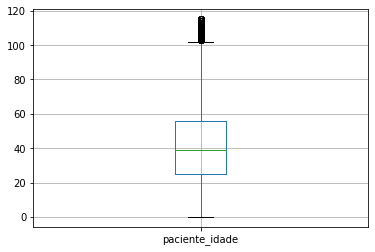

In [11]:
vax_df.boxplot(column = "paciente_idade")